In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn import preprocessing
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [260]:
df = pd.read_csv('./data/bank-additional/bank-additional-full.csv', sep=';')

In [ ]:
df.info()
df.head()
df.describe()

In [261]:
df['y'] = df['y'].map({'no': 0, 'yes': 1})

In [ ]:
df.hist(figsize=(12,10))

In [ ]:
sns.pairplot(df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'y']], hue="y")

In [151]:
df['y'].value_counts()/len(df)

0    0.887346
1    0.112654
Name: y, dtype: float64

In [ ]:
# df.corr()

In [262]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
# for i in categorical:
#     df[i].value_counts().plot(kind='bar', figsize=(10, 6), title=i)
#     plt.show()

In [263]:
from sklearn.preprocessing import MinMaxScaler
numerical = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
            'euribor3m', 'nr.employed']

def scale(df_raw):
    scaler = MinMaxScaler()
    
    df_raw[numerical] = scaler.fit_transform(df_raw[numerical])
    df_scaled = pd.get_dummies(df_raw)
    
    df_scaled.info()
    return df_scaled

In [264]:
import random
random.seed()
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=10, test_size=0.5, random_state=18)
for train_index, test_index in split.split(df, df['y']):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]
    
train_set = scale(train_set)
test_set = scale(test_set)
# print(test_set.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20594 entries, 12519 to 33869
Data columns (total 64 columns):
age                              20594 non-null float64
duration                         20594 non-null float64
campaign                         20594 non-null float64
pdays                            20594 non-null float64
previous                         20594 non-null float64
emp.var.rate                     20594 non-null float64
cons.price.idx                   20594 non-null float64
cons.conf.idx                    20594 non-null float64
euribor3m                        20594 non-null float64
nr.employed                      20594 non-null float64
y                                20594 non-null int64
job_admin.                       20594 non-null uint8
job_blue-collar                  20594 non-null uint8
job_entrepreneur                 20594 non-null uint8
job_housemaid                    20594 non-null uint8
job_management                   20594 non-null uint8
job

In [235]:
test_set['default_yes'] = 0
print(test_set.shape)
test_set['y'].value_counts()

(20594, 64)


0    18274
1     2320
Name: y, dtype: int64

In [156]:
train_set['y'].value_counts()
train_set['y'].value_counts()/len(train_set)
test_set['y'].value_counts()/len(test_set)

0    0.887346
1    0.112654
Name: y, dtype: float64

In [265]:
X_train = train_set.drop('y', axis=1)
y_train = train_set['y']

In [266]:
X_test = test_set.drop('y', axis=1)
y_test = test_set['y']

### K-Means with  n_clusters = 2

In [194]:
kmeans = KMeans(n_clusters=2, random_state=27)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=27, tol=0.0001, verbose=0)

In [27]:
# kmeans.cluster_centers_

array([[ 2.83390249e-01,  5.38299753e-02,  2.56092513e-02,
         9.43941997e-01,  3.69338971e-02,  6.23116660e-01,
         4.33917228e-01,  3.94931730e-01,  5.52359475e-01,
         7.08476778e-01,  2.74283817e-01,  1.93227092e-01,
         3.25365206e-02,  2.42363878e-02,  7.26617340e-02,
         4.65756024e-02,  3.42439765e-02,  8.84557010e-02,
         2.57066970e-02,  1.77907418e-01,  2.39992411e-02,
         6.16581294e-03,  1.12644659e-01,  5.78448112e-01,
         3.06867767e-01,  2.03946120e-03,  8.79339784e-02,
         4.71921836e-02,  1.31568962e-01,  2.27755644e-01,
         6.16581294e-04,  1.33750711e-01,  3.32195029e-01,
         3.89869095e-02,  8.31815595e-01,  1.68042117e-01,
         1.42287991e-04,  4.21741605e-01,  2.11060520e-02,
         5.57152343e-01,  8.22709163e-01,  2.11060520e-02,
         1.56184785e-01,  9.92269019e-01,  7.73098084e-03,
         9.59021059e-02,  2.25241890e-01,  5.92866629e-03,
         2.32593436e-01,  3.15405046e-02,  1.91140201e-0

In [195]:
predictions = kmeans.fit_predict(X_train)

Accuracy 0.5634


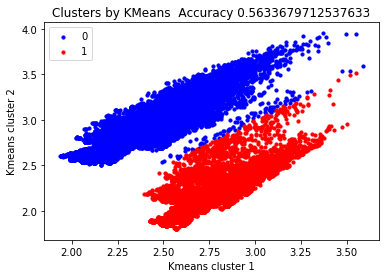

In [198]:
X_train_kmeans = kmeans.fit_transform(X_train)
acc = accuracy_score(y_train, predictions)

if acc < 0.5:
    predictions = np.where(predictions == 0, 1, 0)
    acc = accuracy_score(y_train, predictions)
    
print("Accuracy {:.4f}".format(acc))

plt.scatter(X_train_kmeans[predictions==0, 0], X_train_kmeans[predictions==0, 1], s=10, \
            c='blue', label='0')
plt.scatter(X_train_kmeans[predictions==1, 0], X_train_kmeans[predictions==1, 1], s=10, \
            c='red', label='1')
plt.title("Clusters by KMeans  Accuracy {}".format(acc))
plt.xlabel("Kmeans cluster 1")
plt.ylabel("Kmeans cluster 2")
plt.legend()

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(y_test, y_test_score):
    fpr, tpr, thresholds = roc_curve(y_test, y_test_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', label='dtc roc(area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Bank Marketing')
    plt.legend(loc='lower right')
    plt.show()

In [133]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
import itertools
def plot_confusion_matrix(confusion_matrix=None):
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    num_class = ["not subscribe", "subscribe"]
    plt.title("BM confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(num_class))
    plt.xticks(tick_marks, num_class, rotation=45)
    plt.yticks(tick_marks, num_class)

    fmt = 'd'
    thresh = confusion_matrix.max() / 2.0
    for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
        plt.text(j, i, format(confusion_matrix[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if confusion_matrix[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

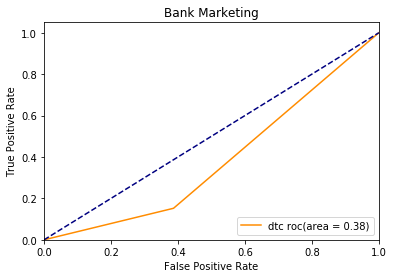

In [32]:
plot_roc_curve(y_train, predictions)

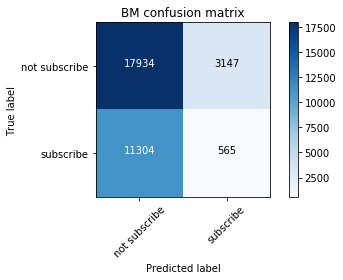

In [33]:
km_confusion_matrix = confusion_matrix(predictions, y_train)
plot_confusion_matrix(km_confusion_matrix)

In [38]:
acc = accuracy_score(y_train, predictions)

if acc < 0.5:
    predictions = np.where(predictions == 0, 1, 0)
    acc = accuracy_score(y_train, predictions)
    
print("Accuracy {:.4f}".format(acc))

Accuracy 0.5614


In [28]:
from sklearn.metrics import silhouette_score
from time import clock

def kMeans(X_train, k=10, max_iter=300):
    sse = {}
    time = {}
    for iter in range(1, k):
        start = clock()
        kmeans = KMeans(n_clusters = iter, max_iter = 300, random_state = 27).fit(X_train)
        time[iter] = clock() - start
        sse[iter] = kmeans.inertia_

        if iter > 1:
            sil_coef = silhouette_score(X_train, kmeans.labels_, metric='euclidean')
            print("n_clusters={:d}, the Silhouette Coefficient is {:.4f}".format(iter, sil_coef))

    plt.subplot(2, 1, 1)
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")

    plt.subplot(2, 1, 2)
    plt.plot(list(time.keys()), list(time.values()))
    plt.xlabel("Number of Clusters")
    plt.ylabel("Running Time")
    
    return plt

n_clusters=2, the Silhouette Coefficient is 0.1007
n_clusters=3, the Silhouette Coefficient is 0.0974
n_clusters=4, the Silhouette Coefficient is 0.0943
n_clusters=5, the Silhouette Coefficient is 0.0821
n_clusters=6, the Silhouette Coefficient is 0.0803
n_clusters=7, the Silhouette Coefficient is 0.0871
n_clusters=8, the Silhouette Coefficient is 0.0801
n_clusters=9, the Silhouette Coefficient is 0.0803


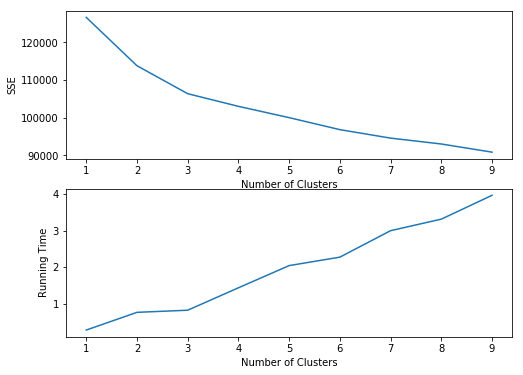

In [30]:
plt.figure(1, figsize=(8, 6))
kMeans(X_train, 10)
# plt.show()

   ### Expectation Maximization | Gaussian Mixture

In [248]:
gaussian = GaussianMixture(n_components=2, random_state=27)
gaussian.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=27, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [249]:
probs = gaussian.predict_proba(X_train)
gaussian.score_samples(X_train)

array([165.79397081, 164.67245632, 165.15670583, ...,  72.68571968,
       164.92830177,  87.1599097 ])

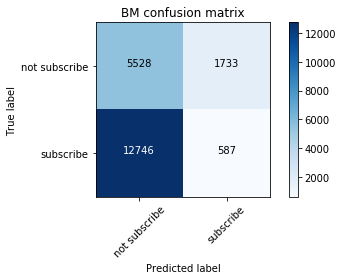

In [250]:
predictions = gaussian.predict(X_train)
gm_confusion_matrix = confusion_matrix(predictions, y_train)
plot_confusion_matrix(gm_confusion_matrix)

In [251]:
acc = accuracy_score(y_train, predictions)

if acc < 0.5:
    predictions = np.where(predictions == 0, 1, 0)
    acc = accuracy_score(y_train, predictions)
    
print("Accuracy {:.4f}".format(acc))

Accuracy 0.7031


def gMM(data, k=10, max_iter=300):
    bic = {}
    time = {}
    for iter in range (1, k):
        start = clock()
        gmm = GaussianMixture(n_components=iter, random_state=27, n_init=5)
        gmm.fit(X_train)

        time[iter] = clock() - start
        bic[iter] = gmm.bic(X_train)

    plt.subplot(2, 1, 1)
    plt.plot(list(bic.keys()), list(bic.values()))
    plt.xlabel("Number of Clusters")
    plt.ylabel("BIC")

    plt.subplot(2, 1, 2)
    plt.plot(list(time.keys()), list(time.values()))
    plt.xlabel("Number of Clusters")
    plt.ylabel("Running Time")
    
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\weiguang\\Anaconda3\\envs\\test\\lib\\site-packages\\matplotlib\\pyplot.py'>

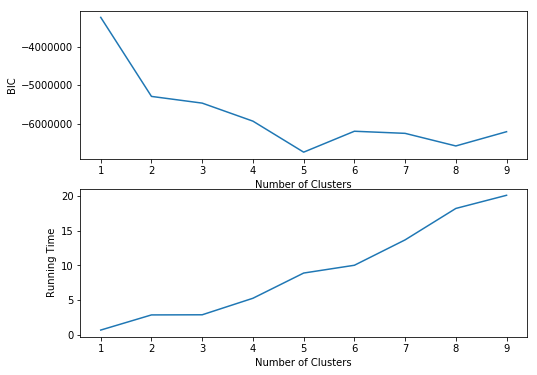

In [40]:
plt.figure(1, figsize=(8, 6))
gMM(X_train, k=10)

### Dimension Reduction

#### Feature Selection

Text(0, 0.5, 'Gini importance')

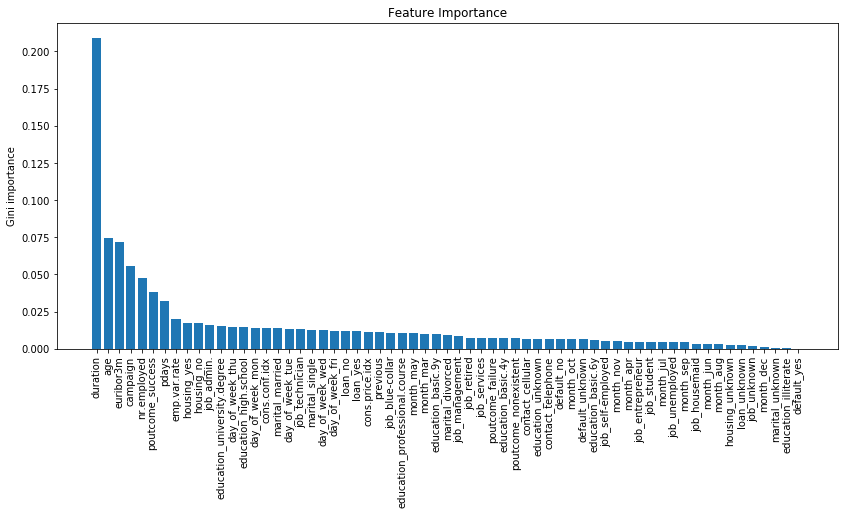

In [67]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train, y_train.values.ravel())

dict_features = {}
for i in range(len(model.feature_importances_)):
    dict_features.update({X_train.columns[i] : model.feature_importances_[i]})
indices = np.argsort(model.feature_importances_)[::-1]

plt.figure(figsize=(14,6))
plt.bar(range(X_train.shape[1]), model.feature_importances_[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation='vertical')
plt.title("Feature Importance")
plt.ylabel("Gini importance")
           

#### Select top count number of attributes

In [88]:
count = 30
top_attributes = []
for i in range(count):
    top_attributes.append(X_train.columns[indices[i]])
print (top_attributes)

['duration', 'age', 'euribor3m', 'campaign', 'nr.employed', 'poutcome_success', 'pdays', 'emp.var.rate', 'housing_yes', 'housing_no', 'job_admin.', 'education_university.degree', 'day_of_week_thu', 'education_high.school', 'day_of_week_mon', 'cons.conf.idx', 'marital_married', 'day_of_week_tue', 'job_technician', 'marital_single', 'day_of_week_wed', 'day_of_week_fri', 'loan_no', 'loan_yes', 'cons.price.idx', 'previous', 'job_blue-collar', 'education_professional.course', 'month_may', 'month_mar']


#### Run K-means with features selected

In [89]:
kmeans = KMeans(n_clusters=2, random_state=27)
kmeans.fit_predict(X_train[top_attributes])

array([0, 1, 1, ..., 1, 1, 0])

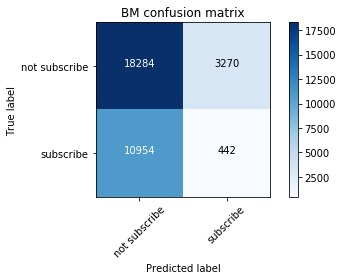

In [90]:
km_confusion_matrix = confusion_matrix(predictions, y_train)
plot_confusion_matrix(km_confusion_matrix)

In [91]:
acc = accuracy_score(y_train, predictions)

if acc < 0.5:
    predictions = np.where(predictions == 0, 1, 0)
    acc = accuracy_score(y_train, predictions)
    
print("Accuracy {:.4f}".format(acc))

Accuracy 0.5683


### Feature Transformation

#### PCA

Accuracy 0.5294


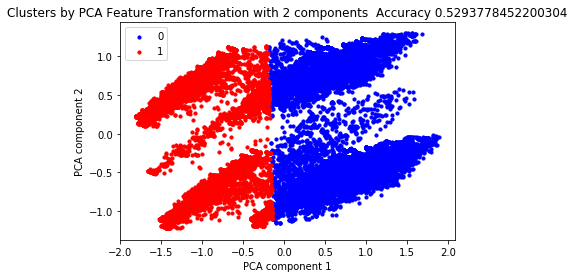

In [99]:
kmeans = KMeans(n_clusters=2, random_state=27)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

kmeans.fit(X_train_pca)
predictions = kmeans.fit_predict(X_train_pca)

acc = accuracy_score(y_train, predictions)

if acc < 0.5:
    predictions = np.where(predictions == 0, 1, 0)
    acc = accuracy_score(y_train, predictions)
    
print("Accuracy {:.4f}".format(acc))

plt.scatter(X_train_pca[predictions==0, 0], X_train_pca[predictions==0, 1], s=10, \
            c='blue', label='0')
plt.scatter(X_train_pca[predictions==1, 0], X_train_pca[predictions==1, 1], s=10, \
            c='red', label='1')
plt.title("Clusters by PCA Feature Transformation with 2 components  Accuracy {}".format(acc))
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.legend()

#### Principal Components and Explained Variance

In [145]:
# PCA search
max_components = 51
var = []
for n_comp in range(max_components):
    pca = PCA(n_components = n_comp)
    pca.fit_transform(X_train)
    expl_var = pca.explained_variance_ratio_
    var.append(np.sum(expl_var))    

Text(0.5, 1.0, 'Principal Components and Explained Variance')

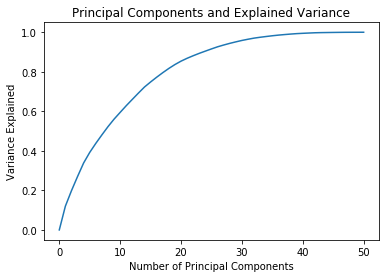

In [146]:
plt.plot(var)
plt.xlabel("Number of Principal Components")
plt.ylabel("Variance Explained")
plt.title("Principal Components and Explained Variance")

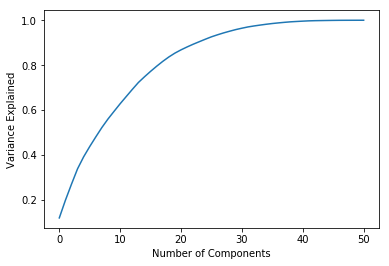

In [148]:
pca_comp = 51

pca = PCA(n_components = pca_comp)
var_explained = {}

pca.fit_transform(X_train)
# explained_variance = pca.explained_variance_ratio_
pca_cumsum = np.cumsum(pca.explained_variance_ratio_)

for i_comp in range(pca_comp):
    var_explained[i_comp] = pca_cumsum[i_comp]
    
plt.figure()
plt.plot(list(var_explained.keys()), list(var_explained.values()))
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained")

plt.show()

Text(0, 0.5, 'PCA Reconstruction Error')

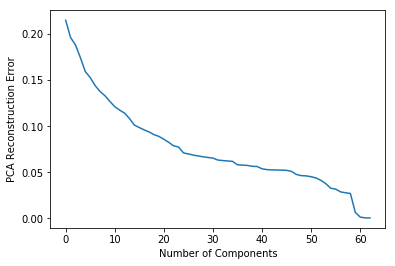

In [244]:
def recon_error(projections, X):
    W = projections.components_
    if sps.issparse(W):
        W = W.todense()
        
    p = pinv(W)
    # unproject data
#     reconstructed = ((p@W) @ (X.T)).T
    reconstructed = (np.matmul(np.matmul(p, W), X.T)).T
    errors = np.square(X - reconstructed)
    return np.nanmean(errors)

n_components = len(X_train.columns)
rec_error = {}

for iter in range(n_components):
    pca = PCA(n_components=iter, random_state=27)
    data_pca = pca.fit_transform(X_train)
    rec_error[iter] = recon_error(pca, X_train)
    
plt.figure()
plt.plot(list(rec_error.keys()), list(rec_error.values()))
plt.xlabel("Number of Components")
plt.ylabel("PCA Reconstruction Error")

#### Pick number of principal components = 25

(0, 1)

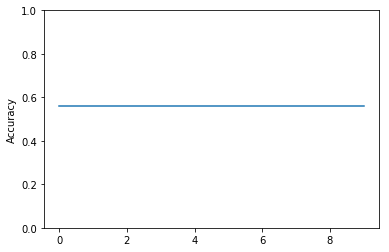

In [113]:
acc = []
repeat = 10
pick_n = 25
for i in range(repeat):
    pca = PCA(n_components=pick_n)
    X_train_pca = pca.fit_transform(X_train)
    
    # kmeans.fit(X_train_pca)
    predictions = kmeans.fit_predict(X_train_pca)
    
    acc_i = accuracy_score(y_train, predictions)

    if acc_i < 0.5:
        predictions = np.where(predictions == 0, 1, 0)
        acc_i = accuracy_score(y_train, predictions)
        
    acc.append(acc_i)

plt.plot(acc)
plt.ylabel("Accuracy")
plt.title("")
plt.ylim(0, 1)

In [187]:
pca = PCA(n_components=27)
X_train_pca = pca.fit_transform(X_train)
# X_train_pca = pd.DataFrame(data=X_train_pca, 
#                 columns=['principal component 1', 'principal component 2', 'principal component 3',
#                         'principal component 4', 'principal component 5', 'principal component 6',
#                         'principal component 7', 'principal component 8', 'principal component 9',
#                         'principal component 10', 'principal component 11', 'principal component 12',
#                         'principal component 13', 'principal component 14', 'principal component 15',
#                         'principal component 16', 'principal component 17', 'principal component 18',
#                         'principal component 19', 'principal component 20', 'principal component 21',
#                         'principal component 22', 'principal component 23', 'principal component 24',
#                         'principal component 25', 'principal component 26', 'principal component 27'])

X_train_pca = pd.DataFrame(data=X_train_pca,  columns=['pc 1', 'pc 2', 'pc 3', 'pc 4', 'pc 5', 
                                                       'pc 6', 'pc 7', 'pc 8', 'pc 9', 'pc 10', 
                                                       'pc 11', 'pc 12', 'pc 13', 'pc 14', 'pc 15', 
                                                       'pc 16', 'pc 17', 'pc 18', 'pc 19', 'pc 20',
                                                       'pc 21', 'pc 22', 'pc 23', 'pc 24', 'pc 25',
                                                        'pc 26', 'pc 27'])


In [191]:
pca.explained_variance_, pca.explained_variance_ratio_

(array([0.73726572, 0.48358512, 0.44047061, 0.41960262, 0.33268872,
        0.27670263, 0.26390691, 0.25667839, 0.2306734 , 0.21082418,
        0.20783654, 0.19771212, 0.19549284, 0.18612121, 0.15516013,
        0.14663014, 0.14129439, 0.1331473 , 0.12170276, 0.10552977,
        0.08874814, 0.07994901, 0.07424304, 0.0734569 , 0.06846222,
        0.06520157, 0.05411199]),
 array([0.11986309, 0.07862024, 0.07161077, 0.0682181 , 0.05408782,
        0.04498572, 0.04290542, 0.04173022, 0.03750239, 0.03427534,
        0.03378962, 0.03214361, 0.03178281, 0.03025919, 0.0252256 ,
        0.02383881, 0.02297134, 0.0216468 , 0.01978617, 0.0171568 ,
        0.01442848, 0.01299794, 0.01207027, 0.01194247, 0.01113044,
        0.01060033, 0.00879741]))

n_clusters=2, the Silhouette Coefficient is 0.1082
n_clusters=3, the Silhouette Coefficient is 0.1068


<module 'matplotlib.pyplot' from 'C:\\Users\\weiguang\\Anaconda3\\envs\\test\\lib\\site-packages\\matplotlib\\pyplot.py'>

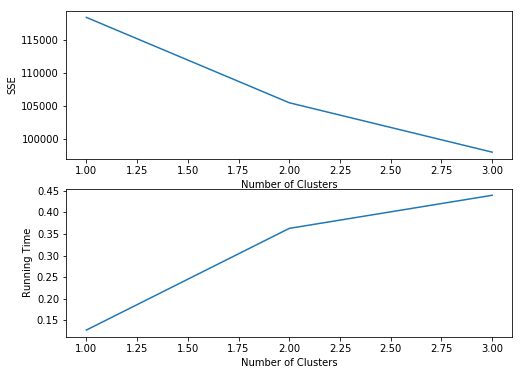

In [50]:
plt.figure(1, figsize=(8,6))
kMeans(X_train_pca, 10)

Accuracy 0.5636


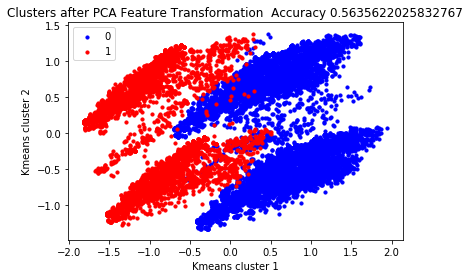

In [238]:
kmeans = KMeans(n_clusters=2, random_state=27)

pca = PCA(n_components=27)
X_train_pca = pca.fit_transform(X_train)

kmeans.fit(X_train_pca)
predictions = kmeans.fit_predict(X_train_pca)

acc = accuracy_score(y_train, predictions)

if acc < 0.5:
    predictions = np.where(predictions == 0, 1, 0)
    acc = accuracy_score(y_train, predictions)
    
print("Accuracy {:.4f}".format(acc))

plt.scatter(X_train_pca[predictions==0, 0], X_train_pca[predictions==0, 1], s=10, \
            c='blue', label='0')
plt.scatter(X_train_pca[predictions==1, 0], X_train_pca[predictions==1, 1], s=10, \
            c='red', label='1')
plt.title("Clusters after PCA Feature Transformation  Accuracy {}".format(acc))
plt.xlabel("Kmeans cluster 1")
plt.ylabel("Kmeans cluster 2")
plt.legend()

<module 'matplotlib.pyplot' from 'C:\\Users\\weiguang\\Anaconda3\\envs\\test\\lib\\site-packages\\matplotlib\\pyplot.py'>

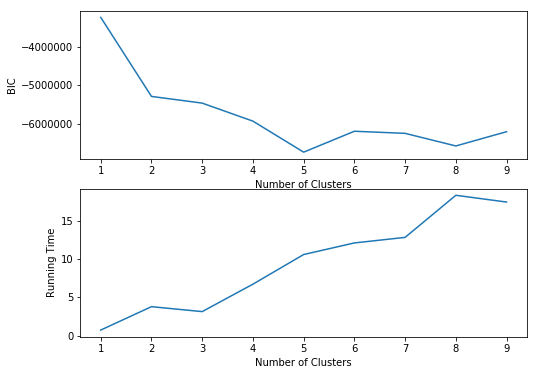

In [51]:
plt.figure(1, figsize=(8,6))
gMM(X_train_pca, 10)

In [255]:
gaussian = GaussianMixture(n_components=2, random_state=27)

pca = PCA(n_components=27)
X_train_pca = pca.fit_transform(X_train)

gaussian.fit(X_train_pca)
predictions = gaussian.predict(X_train_pca)
gm_confusion_matrix = confusion_matrix(predictions, y_train)
# plot_confusion_matrix(gm_confusion_matrix)

acc = accuracy_score(y_train, predictions)

if acc < 0.5:
    predictions = np.where(predictions == 0, 1, 0)
    acc = accuracy_score(y_train, predictions)
    
print("Accuracy {:.4f}".format(acc))

Accuracy 0.6416


Accuracy 0.6416


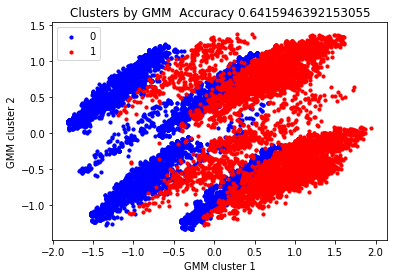

In [256]:
acc = accuracy_score(y_train, predictions)

if acc < 0.5:
    predictions = np.where(predictions == 0, 1, 0)
    acc = accuracy_score(y_train, predictions)
    
print("Accuracy {:.4f}".format(acc))

plt.scatter(X_train_pca[predictions==0, 0], X_train_pca[predictions==0, 1], s=10, \
            c='blue', label='0')
plt.scatter(X_train_pca[predictions==1, 0], X_train_pca[predictions==1, 1], s=10, \
            c='red', label='1')
plt.title("Clusters by GMM  Accuracy {}".format(acc))
plt.xlabel("GMM cluster 1")
plt.ylabel("GMM cluster 2")
plt.legend()

#### ICA

In [116]:
from sklearn.decomposition import FastICA

kmeans = KMeans(n_clusters=2, random_state=27)
acc = []
max_components = 51
for n_comp in range(1, max_components):
    ica = FastICA(n_components=n_comp)
    X_train_ica = ica.fit_transform(X_train)
    
    kmeans.fit(X_train_ica)
    predictions = kmeans.predict(X_train_ica)
    
    acc_i = accuracy_score(y_train, predictions)

    if acc_i < 0.5:
        predictions = np.where(predictions == 0, 1, 0)
        acc_i = accuracy_score(y_train, predictions)
        
    acc.append(acc_i)

Text(0.5, 1.0, 'Independent Component and Accuracy')

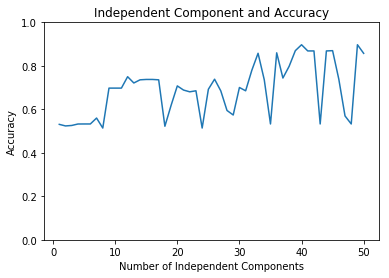

In [118]:
plt.plot(range(1, max_components), acc)
plt.xlabel("Number of Independent Components")
plt.ylabel("Accuracy")
# plt.title("")
plt.ylim(0, 1)
plt.title("Independent Component and Accuracy")

Accuracy 0.7221


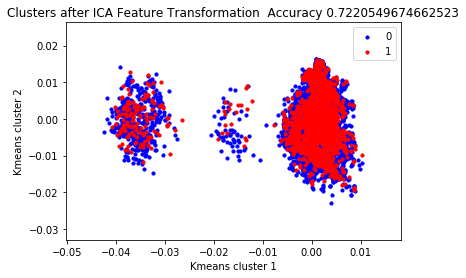

In [272]:
kmeans = KMeans(n_clusters=2, random_state=27)

ica = FastICA(n_components=27)
X_train_ica = ica.fit_transform(X_train)

kmeans.fit(X_train_ica)
predictions = kmeans.fit_predict(X_train_ica)

acc = accuracy_score(y_train, predictions)

if acc < 0.5:
    predictions = np.where(predictions == 0, 1, 0)
    acc = accuracy_score(y_train, predictions)
    
print("Accuracy {:.4f}".format(acc))

plt.scatter(X_train_ica[predictions==0, 0], X_train_ica[predictions==0, 1], s=10, \
            c='blue', label='0')
plt.scatter(X_train_ica[predictions==1, 0], X_train_ica[predictions==1, 1], s=10, \
            c='red', label='1')
plt.title("Clusters after ICA Feature Transformation  Accuracy {}".format(acc))
plt.xlabel("Kmeans cluster 1")
plt.ylabel("Kmeans cluster 2")
plt.legend()

Accuracy 0.7331


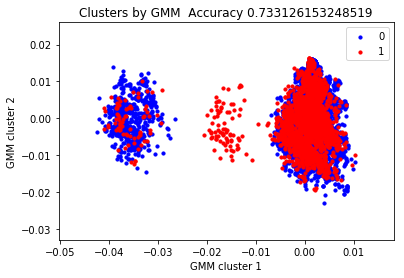

In [273]:
gaussian = GaussianMixture(n_components=2, random_state=27)

# ica = FastICA(n_components=27)
# X_train_ica = ica.fit_transform(X_train)

gaussian.fit(X_train_ica)
predictions = gaussian.predict(X_train_ica)
gm_confusion_matrix = confusion_matrix(predictions, y_train)
# plot_confusion_matrix(gm_confusion_matrix)


acc = accuracy_score(y_train, predictions)

if acc < 0.5:
    predictions = np.where(predictions == 0, 1, 0)
    acc = accuracy_score(y_train, predictions)
    
print("Accuracy {:.4f}".format(acc))

plt.scatter(X_train_ica[predictions==0, 0], X_train_ica[predictions==0, 1], s=10, \
            c='blue', label='0')
plt.scatter(X_train_ica[predictions==1, 0], X_train_ica[predictions==1, 1], s=10, \
            c='red', label='1')
plt.title("Clusters by GMM  Accuracy {}".format(acc))
plt.xlabel("GMM cluster 1")
plt.ylabel("GMM cluster 2")
plt.legend()

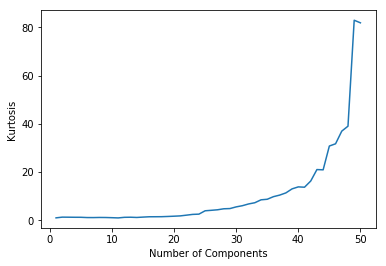

In [142]:
kurto = {}
max_components = 51
for n_comp in range(1, max_components):
    ica = FastICA(n_components=n_comp)
    X_train_ica = ica.fit_transform(X_train)
    X_train_ica = pd.DataFrame(X_train_ica)
    X_train_ica = X_train_ica.kurtosis(axis=0)
    kurto[n_comp] = X_train_ica.abs().mean()
    
plt.figure()
plt.plot(list(kurto.keys()), list(kurto.values()))
plt.xlabel("Number of Components")
plt.ylabel("Kurtosis")

plt.show()

In [55]:
ica = FastICA(n_components=27)
X_train_ica = ica.fit_transform(X_train)
X_train_ica_selected = pd.DataFrame(data=X_train_ica, 
                                    columns=['pc 1', 'pc 2', 'pc 3', 'pc 4', 'pc 5', 
                                             'pc 6', 'pc 7', 'pc 8', 'pc 9', 'pc 10', 
                                              'pc 11', 'pc 12', 'pc 13', 'pc 14', 'pc 15', 
                                               'pc 16', 'pc 17', 'pc 18', 'pc 19', 'pc 20',
                                               'pc 21', 'pc 22', 'pc 23', 'pc 24', 'pc 25',
                                                'pc 26', 'pc 27'])

n_clusters=2, the Silhouette Coefficient is 0.0409
n_clusters=3, the Silhouette Coefficient is 0.0453
n_clusters=4, the Silhouette Coefficient is 0.0783
n_clusters=5, the Silhouette Coefficient is 0.0816
n_clusters=6, the Silhouette Coefficient is 0.0851
n_clusters=7, the Silhouette Coefficient is 0.0891
n_clusters=8, the Silhouette Coefficient is 0.0981
n_clusters=9, the Silhouette Coefficient is 0.0870


<module 'matplotlib.pyplot' from 'C:\\Users\\weiguang\\Anaconda3\\envs\\test\\lib\\site-packages\\matplotlib\\pyplot.py'>

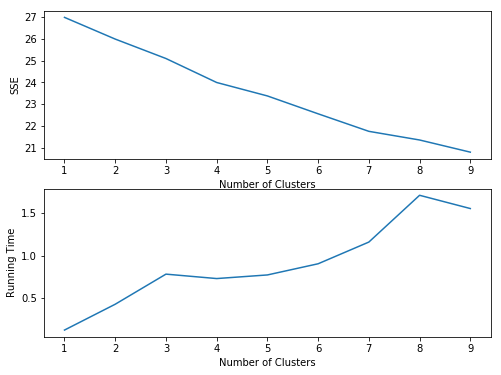

In [56]:
plt.figure(1, figsize=(8, 6))
kMeans(X_train_ica_selected, 10)

<module 'matplotlib.pyplot' from 'C:\\Users\\weiguang\\Anaconda3\\envs\\test\\lib\\site-packages\\matplotlib\\pyplot.py'>

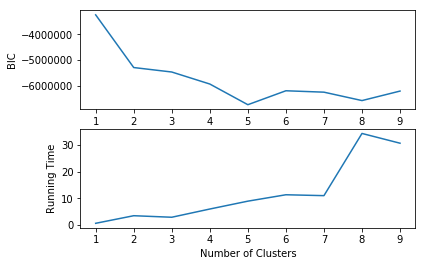

In [57]:
gMM(X_train_ica_selected, 10)

#### RCA Random Projections

#### Highest Accuracy is 0.6942 at 27 components

In [119]:
from sklearn.random_projection import SparseRandomProjection
# from sklearn import random_projection

kmeans = KMeans(n_clusters=2, random_state=27)
acc = []
max_components = 51

for n_comp in range(1, max_components):
    transformer = SparseRandomProjection(n_components=n_comp)
    X_train_rca = transformer.fit_transform(X_train)
    
    kmeans.fit(X_train_rca)
    
    predictions = kmeans.predict(X_train_rca)
    
    acc_i = accuracy_score(y_train, predictions)
    if acc_i < 0.5:
        predictions = np.where(predictions==0, 1, 0)
        acc_i = accuracy_score(y_train, predictions)
    
    acc.append(acc_i)

Text(0.5, 1.0, 'Random Projections and Accuracy')

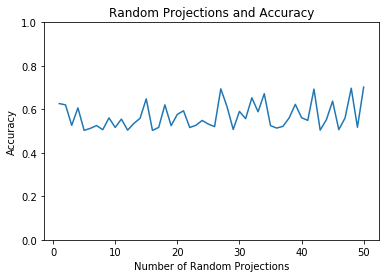

In [120]:
plt.plot(range(1, max_components), acc)
plt.xlabel("Number of Random Projections")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Random Projections and Accuracy")

Accuracy 0.5586


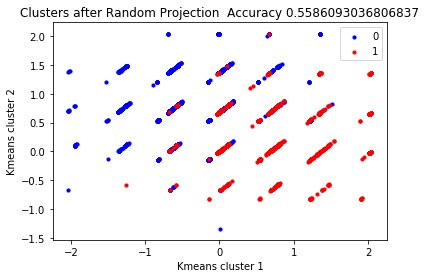

In [226]:
kmeans = KMeans(n_clusters=2, random_state=27)

rca = SparseRandomProjection(n_components=17)
X_train_rca = rca.fit_transform(X_train)

kmeans.fit(X_train_rca)
predictions = kmeans.fit_predict(X_train_rca)

acc = accuracy_score(y_train, predictions)

if acc < 0.5:
    predictions = np.where(predictions == 0, 1, 0)
    acc = accuracy_score(y_train, predictions)
    
print("Accuracy {:.4f}".format(acc))

plt.scatter(X_train_rca[predictions==0, 0], X_train_rca[predictions==0, 1], s=10, \
            c='blue', label='0')
plt.scatter(X_train_rca[predictions==1, 0], X_train_rca[predictions==1, 1], s=10, \
            c='red', label='1')
plt.title("Clusters after Random Projection  Accuracy {}".format(acc))
plt.xlabel("Kmeans cluster 1")
plt.ylabel("Kmeans cluster 2")
plt.legend()

Accuracy 0.6572


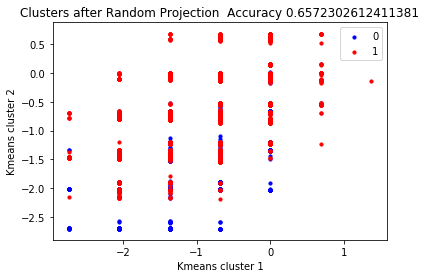

In [241]:
kmeans = KMeans(n_clusters=2, random_state=27)

rca = SparseRandomProjection(n_components=17)
X_train_rca = rca.fit_transform(X_train)

kmeans.fit(X_train_rca)
predictions = kmeans.fit_predict(X_train_rca)

acc = accuracy_score(y_train, predictions)

if acc < 0.5:
    predictions = np.where(predictions == 0, 1, 0)
    acc = accuracy_score(y_train, predictions)
    
print("Accuracy {:.4f}".format(acc))

plt.scatter(X_train_rca[predictions==0, 0], X_train_rca[predictions==0, 1], s=10, \
            c='blue', label='0')
plt.scatter(X_train_rca[predictions==1, 0], X_train_rca[predictions==1, 1], s=10, \
            c='red', label='1')
plt.title("Clusters after Random Projection  Accuracy {}".format(acc))
plt.xlabel("Kmeans cluster 1")
plt.ylabel("Kmeans cluster 2")
plt.legend()

Accuracy 0.5820


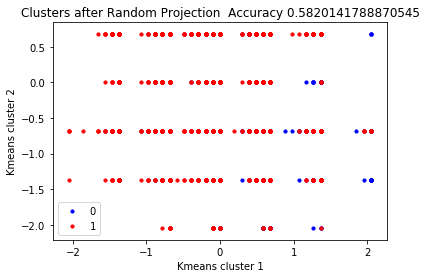

In [242]:
kmeans = KMeans(n_clusters=2, random_state=27)

rca = SparseRandomProjection(n_components=17)
X_train_rca = rca.fit_transform(X_train)

kmeans.fit(X_train_rca)
predictions = kmeans.fit_predict(X_train_rca)

acc = accuracy_score(y_train, predictions)

if acc < 0.5:
    predictions = np.where(predictions == 0, 1, 0)
    acc = accuracy_score(y_train, predictions)
    
print("Accuracy {:.4f}".format(acc))

plt.scatter(X_train_rca[predictions==0, 0], X_train_rca[predictions==0, 1], s=10, \
            c='blue', label='0')
plt.scatter(X_train_rca[predictions==1, 0], X_train_rca[predictions==1, 1], s=10, \
            c='red', label='1')
plt.title("Clusters after Random Projection  Accuracy {}".format(acc))
plt.xlabel("Kmeans cluster 1")
plt.ylabel("Kmeans cluster 2")
plt.legend()

In [192]:
from sklearn.random_projection import SparseRandomProjection
from sklearn.metrics.pairwise import pairwise_distances
import scipy.sparse as sps
from scipy.linalg import pinv

def pairwise_distance_correlation(X1, X2):
    assert X1.shape[0] == X2.shape[0]
    
    d1 = pairwise_distances(X1)
    d2 = pairwise_distances(X2)
    return np.corrcoef(d1.ravel(), d2.ravel())[0,1]

def reconstruction_error(projections, X):
    W = projections.components_
    if sps.issparse(W):
        W = W.todense()
    p = pinv(W)
    # unprojected data
    reconstructed = (np.matmul(np.matmul(p, W), X.T)).T
#     reconstructed = ((p@W) @ (X.T)).T
    errors = np.square(X - reconstructed)
    return np.nanmean(errors)

min_components = 5
max_components = 28
pair_dist_corr = {}
recon_error = {}

for i_comp in range(5, max_components):
#     print(i_comp)
    
    randproj = SparseRandomProjection(n_components = i_comp)
    randproj_copy = randproj
    pair_dist_corr[i_comp] = pairwise_distance_correlation(randproj.fit_transform(X_train), X_train)
    
    randproj_copy.fit(X_train)
    recon_error[i_comp] = reconstruction_error(randproj_copy, X_train)
    

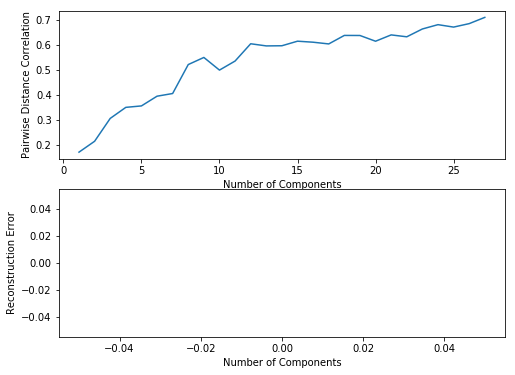

In [193]:
plt.figure(1, figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.plot(list(pair_dist_corr.keys()), list(pair_dist_corr.values()))
plt.xlabel("Number of Components")
plt.ylabel("Pairwise Distance Correlation")

plt.subplot(2, 1, 2)
plt.plot(list(recon_error.keys()), list(recon_error.values()))
plt.xlabel("Number of Components")
plt.ylabel("Reconstruction Error")

plt.show()

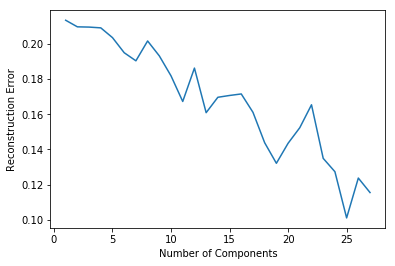

In [240]:
from sklearn.random_projection import SparseRandomProjection
from sklearn.metrics.pairwise import pairwise_distances
import scipy.sparse as sps
from scipy.linalg import pinv

def reconstruction_error(projections, X):
    W = projections.components_
    if sps.issparse(W):
        W = W.todense()
    p = pinv(W)
    # unprojected data
    reconstructed = (np.matmul(np.matmul(p, W), X.T)).T
#     reconstructed = ((p@W) @ (X.T)).T
    errors = np.square(X - reconstructed)
    return np.nanmean(errors)

min_components = 1
max_components = 28
# pair_dist_corr = {}
recon_error = {}

for i_comp in range(min_components, max_components):
#     print(i_comp)
    
    randproj = SparseRandomProjection(n_components = i_comp)
#     randproj_copy = randproj
#     pair_dist_corr[i_comp] = pairwise_distance_correlation(randproj.fit_transform(X_train), X_train)
    
    randproj.fit(X_train)
    recon_error[i_comp] = reconstruction_error(randproj, X_train)
    
plt.figure()
plt.plot(list(recon_error.keys()), list(recon_error.values()))
plt.xlabel("Number of Components")
plt.ylabel("Reconstruction Error")

plt.show()

In [59]:
rp = SparseRandomProjection(n_components=27)
X_train_rp = rp.fit_transform(X_train)
X_train_rp_selected = pd.DataFrame(data=X_train_rp, 
                                  columns=['pc 1', 'pc 2', 'pc 3', 'pc 4', 'pc 5', 
                                             'pc 6', 'pc 7', 'pc 8', 'pc 9', 'pc 10', 
                                              'pc 11', 'pc 12', 'pc 13', 'pc 14', 'pc 15', 
                                               'pc 16', 'pc 17', 'pc 18', 'pc 19', 'pc 20',
                                               'pc 21', 'pc 22', 'pc 23', 'pc 24', 'pc 25',
                                                'pc 26', 'pc 27'])

n_clusters=2, the Silhouette Coefficient is 0.1391
n_clusters=3, the Silhouette Coefficient is 0.1384
n_clusters=4, the Silhouette Coefficient is 0.1339
n_clusters=5, the Silhouette Coefficient is 0.1247
n_clusters=6, the Silhouette Coefficient is 0.1124
n_clusters=7, the Silhouette Coefficient is 0.1157
n_clusters=8, the Silhouette Coefficient is 0.1117
n_clusters=9, the Silhouette Coefficient is 0.1047


<module 'matplotlib.pyplot' from 'C:\\Users\\weiguang\\Anaconda3\\envs\\test\\lib\\site-packages\\matplotlib\\pyplot.py'>

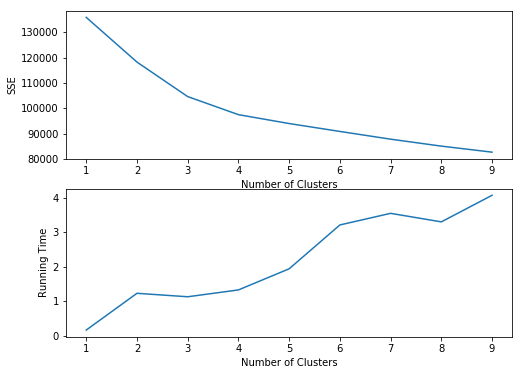

In [61]:
plt.figure(1, figsize=(8, 6))
kMeans(X_train_rp_selected, 10)

<module 'matplotlib.pyplot' from 'C:\\Users\\weiguang\\Anaconda3\\envs\\test\\lib\\site-packages\\matplotlib\\pyplot.py'>

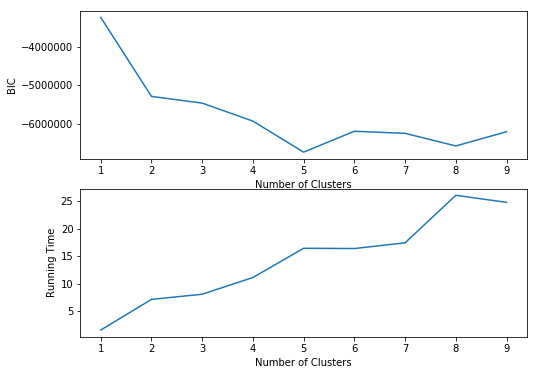

In [63]:
plt.figure(1, figsize=(8, 6))
gMM(X_train_rp_selected, 10)

#### Random Forest to reduce features

In [143]:
from sklearn.ensemble import RandomForestClassifier

def randomForest(X, y, n_estimators, class_weight):
    rfc = RandomForestClassifier(n_estimators=n_estimators, class_weight=class_weight)
    features = rfc.fit(X, y).feature_importances_
    
    imp_feats = {}
    
    for iter in range(len(X.columns)):
        imp_feats[X.columns[iter]] = features[iter]
        
    return imp_feats

In [144]:
n_estimators = 55

features = randomForest(X_train, y_train, n_estimators, {0:1, 1:5})
features

{'age': 0.05776056085207405,
 'duration': 0.3152548123172813,
 'campaign': 0.02955970822194608,
 'pdays': 0.016725089591797325,
 'previous': 0.01371047633267879,
 'emp.var.rate': 0.06098359047244227,
 'cons.price.idx': 0.026424756374308522,
 'cons.conf.idx': 0.03315008243541588,
 'euribor3m': 0.07979260822559316,
 'nr.employed': 0.08333384214536202,
 'job_admin.': 0.008142316054609447,
 'job_blue-collar': 0.008058324821501503,
 'job_entrepreneur': 0.0027200957014017492,
 'job_housemaid': 0.0022467386914970444,
 'job_management': 0.004846490986686844,
 'job_retired': 0.003996501909399867,
 'job_self-employed': 0.003925693796585893,
 'job_services': 0.005338892814436161,
 'job_student': 0.00324304865764111,
 'job_technician': 0.006964894988020184,
 'job_unemployed': 0.0026879392307746896,
 'job_unknown': 0.0009550486317913892,
 'marital_divorced': 0.006074043876283367,
 'marital_married': 0.009271507116631541,
 'marital_single': 0.008072119693508328,
 'marital_unknown': 0.000242279106498

### PCA selection for Neural Network

In [125]:
pca = PCA(n_components=27)
X_train_pca = pca.fit_transform(X_train)

In [124]:
import keras
from keras.models import Sequential
from keras.layers import Dense

NNclassifier = Sequential()

Using TensorFlow backend.


In [135]:
NNclassifier.add(Dense(output_dim=64, init='uniform', activation='relu', input_dim=27))
NNclassifier.add(Dense(output_dim=32, init='uniform', activation='relu'))
NNclassifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

NNclassifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = NNclassifier.fit(X_train_pca, y_train, batch_size=20, nb_epoch=8)

Epoch 1/8
32950/32950 [==============================] - 2s 52us/step - loss: 0.3180 - acc: 0.8896
Epoch 2/8
32950/32950 [==============================] - 1s 43us/step - loss: 0.2798 - acc: 0.8958
Epoch 3/8
32950/32950 [==============================] - 2s 46us/step - loss: 0.2767 - acc: 0.8974
Epoch 4/8
32950/32950 [==============================] - 2s 46us/step - loss: 0.2745 - acc: 0.8993
Epoch 5/8
32950/32950 [==============================] - 1s 46us/step - loss: 0.2732 - acc: 0.8992
Epoch 6/8
32950/32950 [==============================] - 2s 46us/step - loss: 0.2718 - acc: 0.9004
Epoch 7/8
32950/32950 [==============================] - 1s 45us/step - loss: 0.2712 - acc: 0.9002
Epoch 8/8
32950/32950 [==============================] - 1s 45us/step - loss: 0.2700 - acc: 0.9018


In [136]:
hist.history.get('acc')[-1]

0.9018209357724747

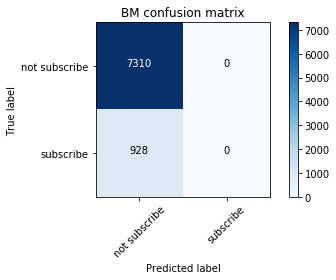

In [137]:
X_test_pca = pca.fit_transform(X_test)
y_nnc_prob = NNclassifier.predict(X_test_pca)
y_nnc_pred = y_nnc_prob.astype(int)

# y_nnc_pred = NNclassifier.predict(X_test_pca)
nnc_confusion_matrix = confusion_matrix(y_test, y_nnc_pred)
plot_confusion_matrix(nnc_confusion_matrix)

In [64]:
from sklearn.model_selection import train_test_split

X_train_NN, X_val_NN, y_train_NN, y_val_NN = train_test_split(X_train.values, y_train.values, 
                                                             test_size=0.3)

In [77]:
def plot_loss(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Trani', 'Valid'], loc='upper right')
    plt.show()
    
def plot_recall(hist):
    plt.plot(hist.history['recall'])
    plt.plot(hist.history['val_recall'])
    plt.title('Model Recall')
    plt.ylabel('Recall')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Valid'], loc='lower right')
    plt.show()

In [75]:
import keras.backend as K
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from sklearn.metrics import recall_score

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def fit_nnclassifier(parameters, X_train, y_train, X_val, y_val, 
                     input_shape, epochs=10, batch_size=40, metrics=recall):
    for activation in parameters.get('activation'):
        for optimizer in parameters.get('optimizer'):
            for hidden in parameters.get('hiddens'):
                nnc = Sequential()
                nnc.add(Dense(hidden, activation=activation, input_shape=(input_shape,)))
                nnc.add(Dense(output_dim=hidden, init='uniform', activation=activation))
                nnc.add(Dense(output_dim=1, init='uniform', activation=activation))
                
                nnc.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metrics])
                nnc.summary()
                
                filepath = ''
                if(isinstance(optimizer, str)):
                    filepath = 'weights_best_' + activation + '_' + optimizer + '.hdf5'
                else:
                    filepath = 'weigths_best_' + activation + '_' + \
                        str(type(optimizer)).strip('<>\'').split('.')[-1] + '.hdf5'
                
                checkpointer = ModelCheckpoint(filepath, monitor=recall, verbose=0,
                                               save_best_only=False, mode='max')
                print('##################################')
                history = nnc.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, 
                                  batch_size=batch_size, callbacks=[checkpointer], verbose=0)
                plot_loss(history)
                plot_recall(history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                4096      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 8,321
Trainable params: 8,321
Non-trainable params: 0
_________________________________________________________________
##################################


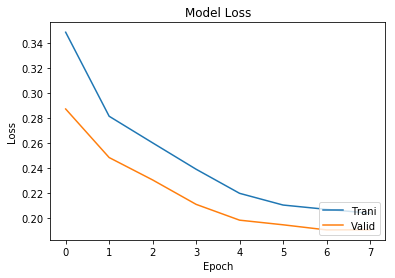

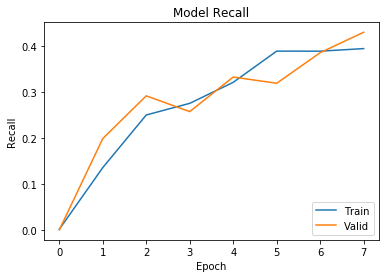

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                2048      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 3,137
Trainable params: 3,137
Non-trainable params: 0
_________________________________________________________________
##################################


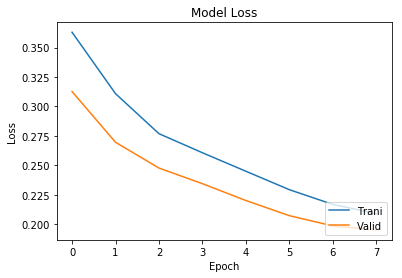

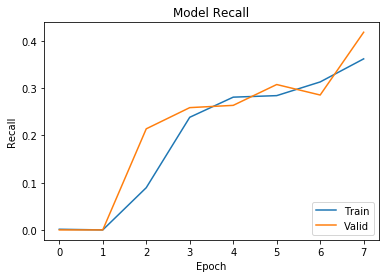

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                4096      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 8,321
Trainable params: 8,321
Non-trainable params: 0
_________________________________________________________________
##################################


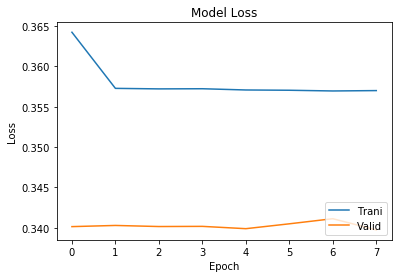

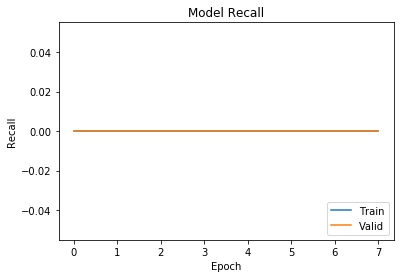

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                2048      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 3,137
Trainable params: 3,137
Non-trainable params: 0
_________________________________________________________________
##################################


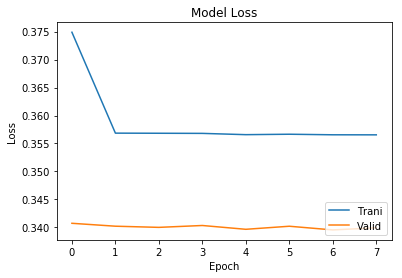

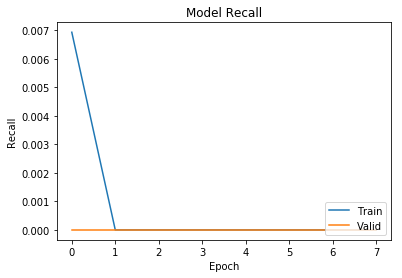

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 64)                4096      
_________________________________________________________________
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 65        
Total params: 8,321
Trainable params: 8,321
Non-trainable params: 0
_________________________________________________________________
##################################


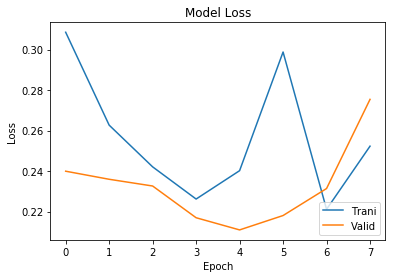

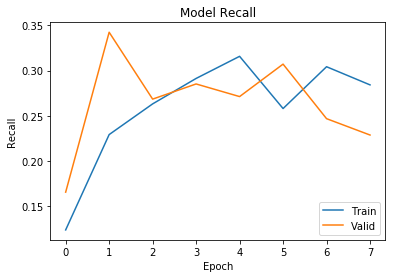

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 32)                2048      
_________________________________________________________________
dense_23 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 33        
Total params: 3,137
Trainable params: 3,137
Non-trainable params: 0
_________________________________________________________________
##################################


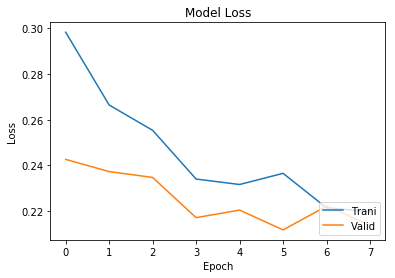

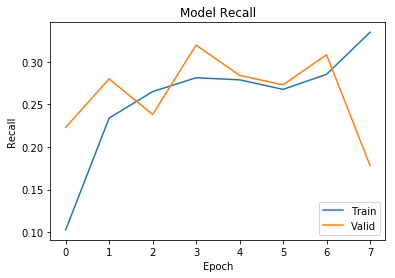

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                4096      
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 65        
Total params: 8,321
Trainable params: 8,321
Non-trainable params: 0
_________________________________________________________________
##################################


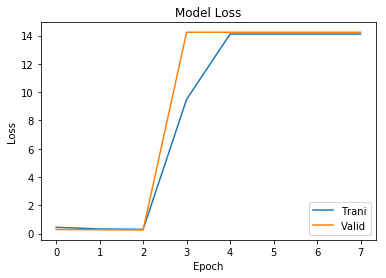

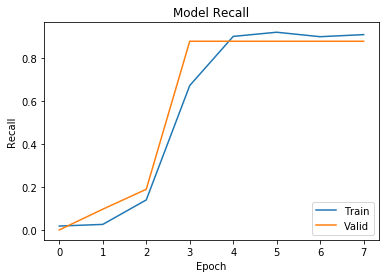

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 32)                2048      
_________________________________________________________________
dense_29 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 33        
Total params: 3,137
Trainable params: 3,137
Non-trainable params: 0
_________________________________________________________________
##################################


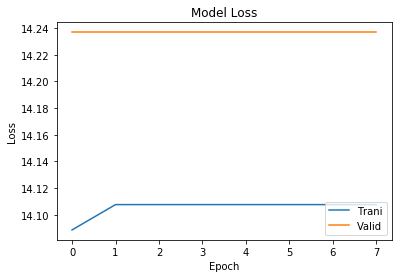

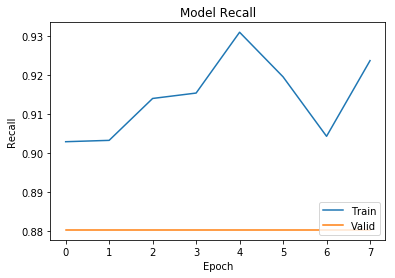

In [78]:
parameters = {'activation':['sigmoid', 'relu'],
             'optimizer': ['adam', 'sgd'],
             'hiddens': [64, 32]}
fit_nnclassifier(parameters, X_train_NN, y_train_NN, X_val_NN, y_val_NN, X_train_NN.shape[1],
                epochs=8, batch_size=20, metrics=recall)

Train on 14415 samples, validate on 6179 samples
Epoch 1/8
14415/14415 [==============================] - 3s 227us/step - loss: 0.3457 - recall: 0.0000e+00 - acc: 0.8849 - val_loss: 0.2840 - val_recall: 0.0000e+00 - val_acc: 0.8930

Epoch 00001: saving model to weights_best_sigmod_adam_fin.hdf5
Epoch 2/8
14415/14415 [==============================] - 2s 161us/step - loss: 0.2799 - recall: 0.1446 - acc: 0.8925 - val_loss: 0.2461 - val_recall: 0.2383 - val_acc: 0.9081

Epoch 00002: saving model to weights_best_sigmod_adam_fin.hdf5
Epoch 3/8
14415/14415 [==============================] - 2s 170us/step - loss: 0.2592 - recall: 0.2645 - acc: 0.8975 - val_loss: 0.2294 - val_recall: 0.3031 - val_acc: 0.9089

Epoch 00003: saving model to weights_best_sigmod_adam_fin.hdf5
Epoch 4/8
14415/14415 [==============================] - 3s 180us/step - loss: 0.2357 - recall: 0.3052 - acc: 0.9015 - val_loss: 0.2075 - val_recall: 0.2816 - val_acc: 0.9118

Epoch 00004: saving model to weights_best_sigmod_a

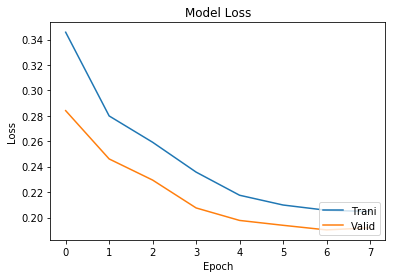

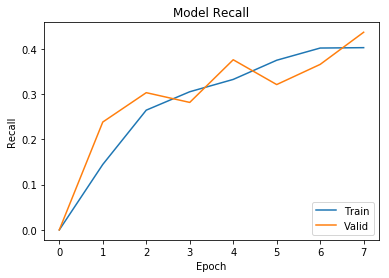

In [81]:
nnc = Sequential()
nnc.add(Dense(64, activation='sigmoid', input_shape=(X_train.values.shape[1],)))
nnc.add(Dense(output_dim=64, init='uniform', activation='sigmoid'))
nnc.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

nnc.compile(loss='binary_crossentropy', optimizer='adam', metrics=[recall, 'acc'])

checkpointer = ModelCheckpoint('weights_best_sigmod_adam_fin.hdf5',
                              monitor=recall, verbose=1, save_best_only=False, mode='max')

hist = nnc.fit(X_train_NN, y_train_NN, validation_data=(X_val_NN, y_val_NN), epochs=8,
              batch_size=20, callbacks=[checkpointer], verbose=1)

plot_loss(hist)
plot_recall(hist)

In [82]:
hist.history.get('acc')[-1]

0.9083593425922745

### Features reduced for NN

In [167]:
df_nn = df.replace(' ', np.NaN)
df_nn.dropna(inplace=True)
df_nn = pd.get_dummies(df_nn)
# df_scaled = scale(df_nn)

features = df_nn.columns.values[:-1]
target = df_nn.columns.values[-1]

X = df_nn[features]
y = df_nn[[target]]

In [181]:
pca = PCA(n_components = 27)
X_pca = pca.fit_transform(X)
X_pca_selected = pd.DataFrame(data=X_pca, 
                                   columns=['pc 1', 'pc 2', 'pc 3', 'pc 4', 'pc 5', 
                                             'pc 6', 'pc 7', 'pc 8', 'pc 9', 'pc 10', 
                                              'pc 11', 'pc 12', 'pc 13', 'pc 14', 'pc 15', 
                                               'pc 16', 'pc 17', 'pc 18', 'pc 19', 'pc 20',
                                               'pc 21', 'pc 22', 'pc 23', 'pc 24', 'pc 25',
                                                'pc 26', 'pc 27'])

In [182]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_pca_selected, y, test_size=0.2)
scaler = preprocessing.MinMaxScaler()
scaler.fit(Xtrain)
Xtrain_scaled = scaler.transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest) 

In [170]:
# pca = PCA(n_components = 27)
# X_pca = pca.fit_transform(X_train)
# X_pca_selected = pd.DataFrame(data=X_pca, 
#                                    columns=['pc 1', 'pc 2', 'pc 3', 'pc 4', 'pc 5', 
#                                              'pc 6', 'pc 7', 'pc 8', 'pc 9', 'pc 10', 
#                                               'pc 11', 'pc 12', 'pc 13', 'pc 14', 'pc 15', 
#                                                'pc 16', 'pc 17', 'pc 18', 'pc 19', 'pc 20',
#                                                'pc 21', 'pc 22', 'pc 23', 'pc 24', 'pc 25',
#                                                 'pc 26', 'pc 27'])

In [171]:
# from sklearn.model_selection import train_test_split

# X_train_NN, X_val_NN, y_train_NN, y_val_NN = train_test_split(X_pca_selected, y_train, 
#                                                              test_size=0.3)
# nnc = Sequential()
# nnc.add(Dense(64, activation='sigmoid', input_shape=(X_train_NN.values.shape[1],)))
# nnc.add(Dense(output_dim=64, init='uniform', activation='sigmoid'))
# nnc.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

# nnc.compile(loss='binary_crossentropy', optimizer='adam', metrics=[recall, 'acc'])
# hist = nnc.fit(X_train_NN, y_train_NN, validation_data=(X_val_NN, y_val_NN), 
#                batch_size=20, nb_epoch=8)
# # hist = nnc.fit(X_train_NN, y_train_NN, validation_data=(X_val_NN, y_val_NN), epochs=8,
# #               batch_size=20, callbacks=[checkpointer], verbose=1)

# plot_loss(hist)
# plot_recall(hist)

In [172]:
# # X_test_pca = pca.fit_transform(X_test)
# y_nnc_prob = nnc.predict(X_test)
# y_nnc_pred = y_nnc_prob.astype(int)

# # y_nnc_pred = NNclassifier.predict(X_test_pca)
# nnc_confusion_matrix = confusion_matrix(y_test, y_nnc_pred)
# plot_confusion_matrix(nnc_confusion_matrix)

Train on 29655 samples, validate on 3295 samples
Epoch 1/8
29655/29655 [==============================] - 2s 77us/step - loss: 0.1450 - recall: 6.7442e-04 - acc: 0.9666 - val_loss: 0.1062 - val_recall: 0.0000e+00 - val_acc: 0.9669
Epoch 2/8
29655/29655 [==============================] - 2s 52us/step - loss: 0.0268 - recall: 0.3914 - acc: 0.9902 - val_loss: 0.0109 - val_recall: 0.4719 - val_acc: 0.9967
Epoch 3/8
29655/29655 [==============================] - 2s 52us/step - loss: 0.0105 - recall: 0.4765 - acc: 0.9963 - val_loss: 0.0089 - val_recall: 0.4719 - val_acc: 0.9967
Epoch 4/8
29655/29655 [==============================] - 2s 58us/step - loss: 0.0094 - recall: 0.4779 - acc: 0.9964 - val_loss: 0.0084 - val_recall: 0.4659 - val_acc: 0.9964
Epoch 5/8
29655/29655 [==============================] - 2s 70us/step - loss: 0.0091 - recall: 0.4787 - acc: 0.9963 - val_loss: 0.0083 - val_recall: 0.4598 - val_acc: 0.9970
Epoch 6/8
29655/29655 [==============================] - 1s 50us/step - l

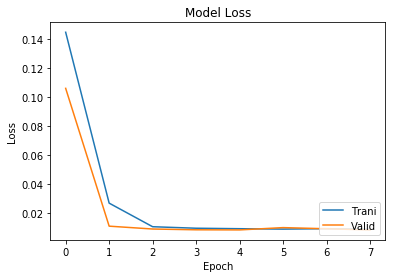

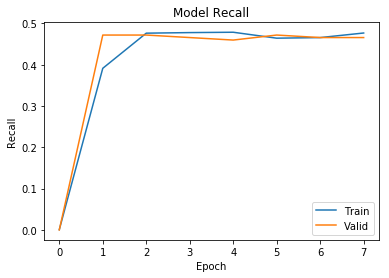

In [183]:
from sklearn.model_selection import train_test_split

X_train_NN, X_val_NN, y_train_NN, y_val_NN = train_test_split(Xtrain_scaled, ytrain.values, 
                                                             test_size=0.1)

nnc = Sequential()
nnc.add(Dense(64, activation='sigmoid', input_shape=(X_train_NN.shape[1],)))
nnc.add(Dense(output_dim=64, init='uniform', activation='sigmoid'))
nnc.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

nnc.compile(loss='binary_crossentropy', optimizer='adam', metrics=[recall, 'acc'])
hist = nnc.fit(X_train_NN, y_train_NN, validation_data=(X_val_NN, y_val_NN), 
               batch_size=20, nb_epoch=8)
# hist = nnc.fit(X_train_NN, y_train_NN, validation_data=(X_val_NN, y_val_NN), epochs=8,
#               batch_size=20, callbacks=[checkpointer], verbose=1)

plot_loss(hist)
plot_recall(hist)

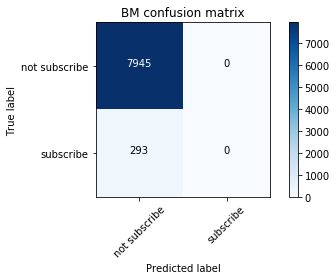

In [184]:
# X_test_pca = pca.fit_transform(X_test)
y_nnc_prob = nnc.predict(Xtest_scaled)
y_nnc_pred = y_nnc_prob.astype(int)

# y_nnc_pred = NNclassifier.predict(X_test_pca)
nnc_confusion_matrix = confusion_matrix(ytest, y_nnc_pred)
plot_confusion_matrix(nnc_confusion_matrix)

In [185]:
pca = PCA(n_components = 27)
X_pca = pca.fit_transform(X)
X_pca_selected = pd.DataFrame(data=X_pca, 
                                   columns=['pc 1', 'pc 2', 'pc 3', 'pc 4', 'pc 5', 
                                             'pc 6', 'pc 7', 'pc 8', 'pc 9', 'pc 10', 
                                              'pc 11', 'pc 12', 'pc 13', 'pc 14', 'pc 15', 
                                               'pc 16', 'pc 17', 'pc 18', 'pc 19', 'pc 20',
                                               'pc 21', 'pc 22', 'pc 23', 'pc 24', 'pc 25',
                                                'pc 26', 'pc 27'])

kmeans_pca = KMeans(n_clusters=2, max_iter=300)
kmeans_pca.fit(X_pca_selected)
X_pca_selected['cluster'] = kmeans_pca.labels_


Train on 29655 samples, validate on 3295 samples
Epoch 1/8
29655/29655 [==============================] - 2s 75us/step - loss: 0.1441 - recall: 0.0000e+00 - acc: 0.9670 - val_loss: 0.0962 - val_recall: 0.0000e+00 - val_acc: 0.9697
Epoch 2/8
29655/29655 [==============================] - 2s 54us/step - loss: 0.0268 - recall: 0.3686 - acc: 0.9898 - val_loss: 0.0154 - val_recall: 0.4355 - val_acc: 0.9948
Epoch 3/8
29655/29655 [==============================] - 2s 54us/step - loss: 0.0105 - recall: 0.4772 - acc: 0.9965 - val_loss: 0.0134 - val_recall: 0.4355 - val_acc: 0.9948
Epoch 4/8
29655/29655 [==============================] - 2s 70us/step - loss: 0.0092 - recall: 0.4886 - acc: 0.9965 - val_loss: 0.0108 - val_recall: 0.4274 - val_acc: 0.9954
Epoch 5/8
29655/29655 [==============================] - 2s 69us/step - loss: 0.0088 - recall: 0.4757 - acc: 0.9966 - val_loss: 0.0120 - val_recall: 0.4077 - val_acc: 0.9967
Epoch 6/8
29655/29655 [==============================] - 2s 68us/step - l

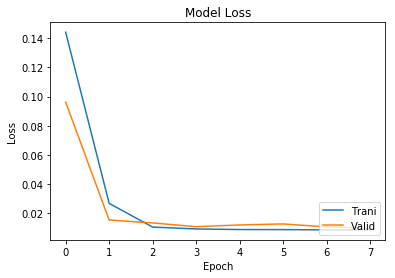

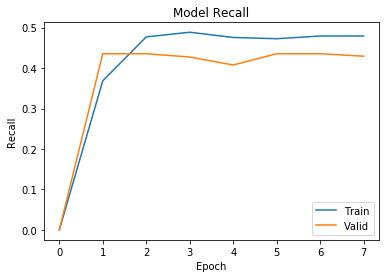

In [186]:
from sklearn.model_selection import train_test_split

X_train_NN, X_val_NN, y_train_NN, y_val_NN = train_test_split(Xtrain_scaled, ytrain.values, 
                                                             test_size=0.1)

nnc = Sequential()
nnc.add(Dense(64, activation='sigmoid', input_shape=(X_train_NN.shape[1],)))
nnc.add(Dense(output_dim=64, init='uniform', activation='sigmoid'))
nnc.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

nnc.compile(loss='binary_crossentropy', optimizer='adam', metrics=[recall, 'acc'])
hist = nnc.fit(X_train_NN, y_train_NN, validation_data=(X_val_NN, y_val_NN), 
               batch_size=20, nb_epoch=8)
# hist = nnc.fit(X_train_NN, y_train_NN, validation_data=(X_val_NN, y_val_NN), epochs=8,
#               batch_size=20, callbacks=[checkpointer], verbose=1)

plot_loss(hist)
plot_recall(hist)